## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [91]:
import pandas as pd
df = pd.read_csv(r'C:\Users\asus\Desktop\github_bot_processed_data.csv')
pd.set_option('display.max_rows', 200)  
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 200)  
print(df.head())

   label  type  site_admin  company   blog  location  hireable                                                bio  public_repos  public_gists  followers  following                 created_at  \
0  Human  True       False    False  False     False     False                                                NaN            26             1          5          1  2011-09-26 17:27:03+00:00   
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the pro...            30             3          9          6  2015-06-29 10:12:46+00:00   
2  Human  True       False     True   True      True      True         Time is unimportant,\nonly life important.           103            49       1212        221  2008-08-29 16:20:03+00:00   
3    Bot  True       False    False  False      True     False                                                NaN            49             0         84          2  2014-05-20 18:43:09+00:00   
4  Human  True       False    

In [92]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB
None


2.区别info输出所有列的名称非空值计数和数据类型，head则是输出前几行的所有数据

In [93]:
print(df.describe(include='all'))

        label   type site_admin company   blog location hireable                bio  public_repos  public_gists     followers     following                 created_at                 updated_at  \
count   19768  19768      19768   19768  19768    19768    19768               8839  19768.000000  19768.000000  19768.000000  19768.000000                      19768                      19768   
unique      2      2          2       2      2        2        2               8641           NaN           NaN           NaN           NaN                      19767                      19633   
top     Human   True      False    True  False     True    False  Software Engineer           NaN           NaN           NaN           NaN  2009-07-15 13:20:42+00:00  2023-10-11 11:17:28+00:00   
freq    18578  19597      19678   10794  11256    12691    16470                 77           NaN           NaN           NaN           NaN                          2                          3   
mean      NaN  

In [94]:
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'])
if 'updated_at' in df.columns:
    df['updated_at'] = pd.to_datetime(df['updated_at'])
if 'price' in df.columns:
    df['price'] = df['price'].apply(lambda x: f"${x:.2f}")
if 'percentage' in df.columns:
    df['percentage'] = df['percentage'].apply(lambda x: f"{x * 100:.2f}%")

In [95]:
from datetime import datetime
current_date = datetime.now()
formatted_date =current_date.strftime("%Y-%m-%d")
amount = 1234.5678
formatted_amount = "${:.2f}".format(amount)
ratio = 0.75
formatted_ratio = "{:.2%}".format(ratio)
print("今天的日期是:", formatted_date)
print("金额为:", formatted_amount)
print("比率是:", formatted_ratio)

今天的日期是: 2024-11-30
金额为: $1234.57
比率是: 75.00%


In [96]:
import numpy as np
# 对指定列进行对数变换
df[['public_repos', 'public_gists', 'followers', 'following']] += 1
print(df.head())
for column in ['public_repos', 'public_gists', 'followers', 'following']:
    if column in df.columns and df[column].min() > 0:  # 确保没有非正数值
        df[column] =np.log(df[column])
    else:
        print(f"Column {column} contains non-positive values, log transformation is not applied.")
print(df.head())


   label  type  site_admin  company   blog  location  hireable                                                bio  public_repos  public_gists  followers  following                created_at  \
0  Human  True       False    False  False     False     False                                                NaN            27             2          6          2 2011-09-26 17:27:03+00:00   
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the pro...            31             4         10          7 2015-06-29 10:12:46+00:00   
2  Human  True       False     True   True      True      True         Time is unimportant,\nonly life important.           104            50       1213        222 2008-08-29 16:20:03+00:00   
3    Bot  True       False    False  False      True     False                                                NaN            50             1         85          3 2014-05-20 18:43:09+00:00   
4  Human  True       False    False

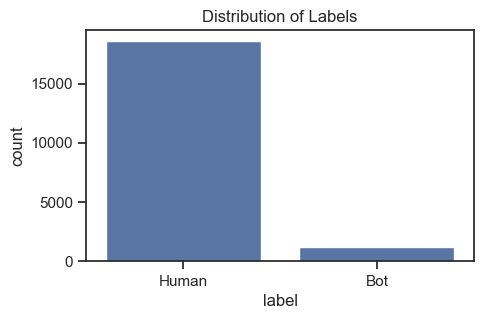

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.title('Distribution of Labels')
plt.show()

In [98]:
feature_counts = df[['site_admin', 'company']].sum()
stacked_data = feature_counts.reset_index()
stacked_data.columns = ['feature', 'count']
not_site_admin_count = pd.DataFrame([{'feature': 'not_site_admin', 'count': df['site_admin'].size - df['site_admin'].sum()}])
no_company_count = pd.DataFrame([{'feature': 'no_company', 'count': df['company'].size - df['company'].sum()}])
stacked_data = pd.concat([stacked_data, not_site_admin_count, no_company_count], ignore_index=True)
stacked_data = stacked_data.set_index('feature').reindex(['site_admin', 'not_site_admin', 'company', 'no_company']).reset_index()

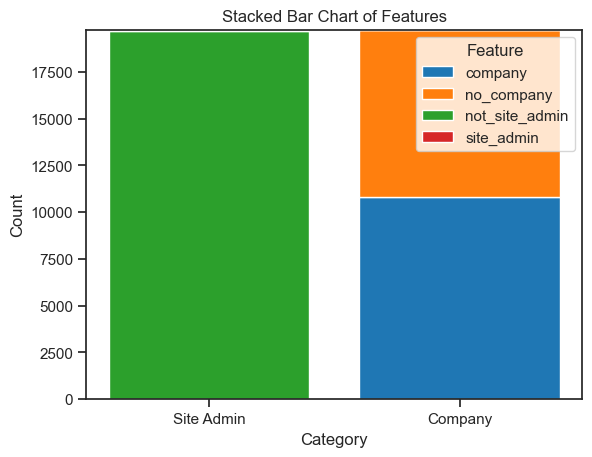

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bottom = [0] * 2 
for i, (feature, count) in enumerate(stacked_data.groupby('feature')['count']):
    if feature == 'site_admin' or feature == 'not_site_admin':
        index = 0  
    else:
        index = 1  
    adjusted_count = [count.iloc[0] if j == index else 0 for j in range(2)]
    plt.bar(range(2), adjusted_count, bottom=bottom, label=feature, color=colors[i % len(colors)])
    bottom = [b + c for b, c in zip(bottom, adjusted_count)]
plt.title('Stacked Bar Chart of Features')
plt.xticks(range(2), ['Site Admin', 'Company'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Feature')
plt.show()

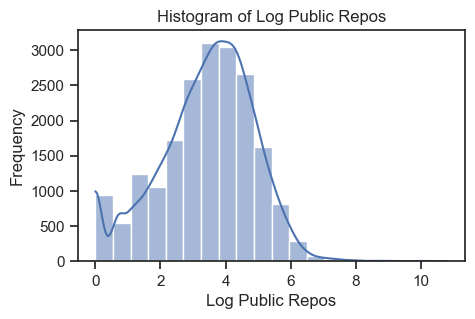

In [100]:
plt.figure(figsize=(5, 3))
sns.histplot(df['public_repos'], bins=20, kde=True)
plt.title('Histogram of Log Public Repos')
plt.xlabel('Log Public Repos')
plt.ylabel('Frequency')
plt.show()

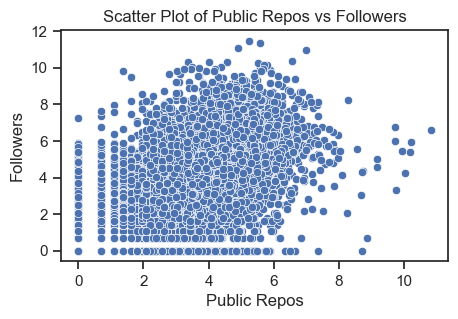

In [109]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='public_repos', y='followers', data=df)
plt.title('Scatter Plot of Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

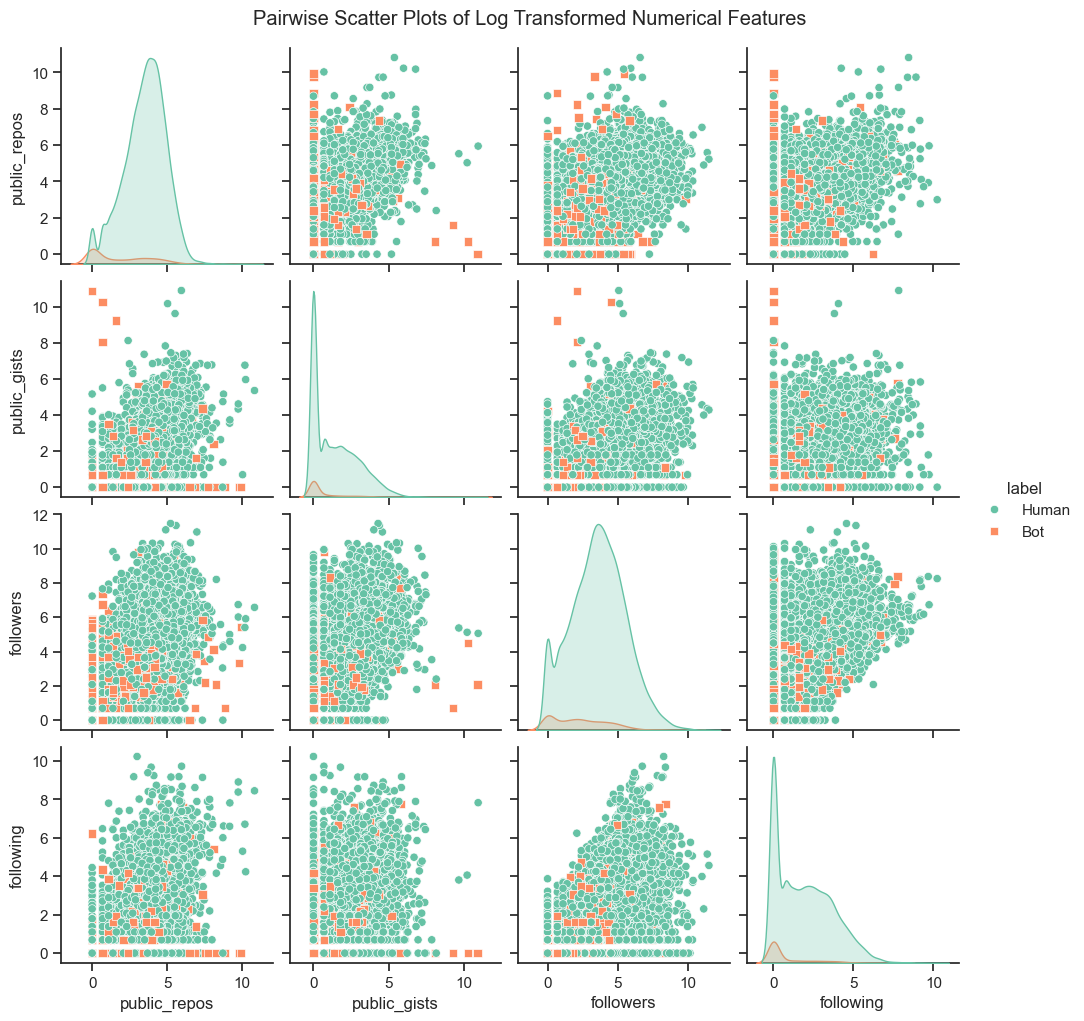

In [101]:
numerical_features = ['public_repos', 'public_gists', 'followers', 'following']
sns.set(style="ticks")
g = sns.pairplot(df[numerical_features + ['label']], hue='label', palette="Set2", diag_kind="kde", markers=["o", "s"], height=2.5)
g.fig.suptitle('Pairwise Scatter Plots of Log Transformed Numerical Features', y=1.02)
plt.show()

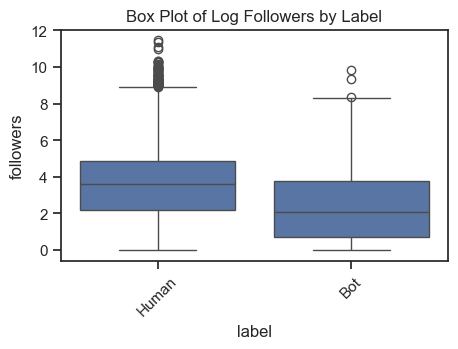

In [102]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='label', y='followers', data=df)
plt.title('Box Plot of Log Followers by Label')
plt.xticks(rotation=45)
plt.show()

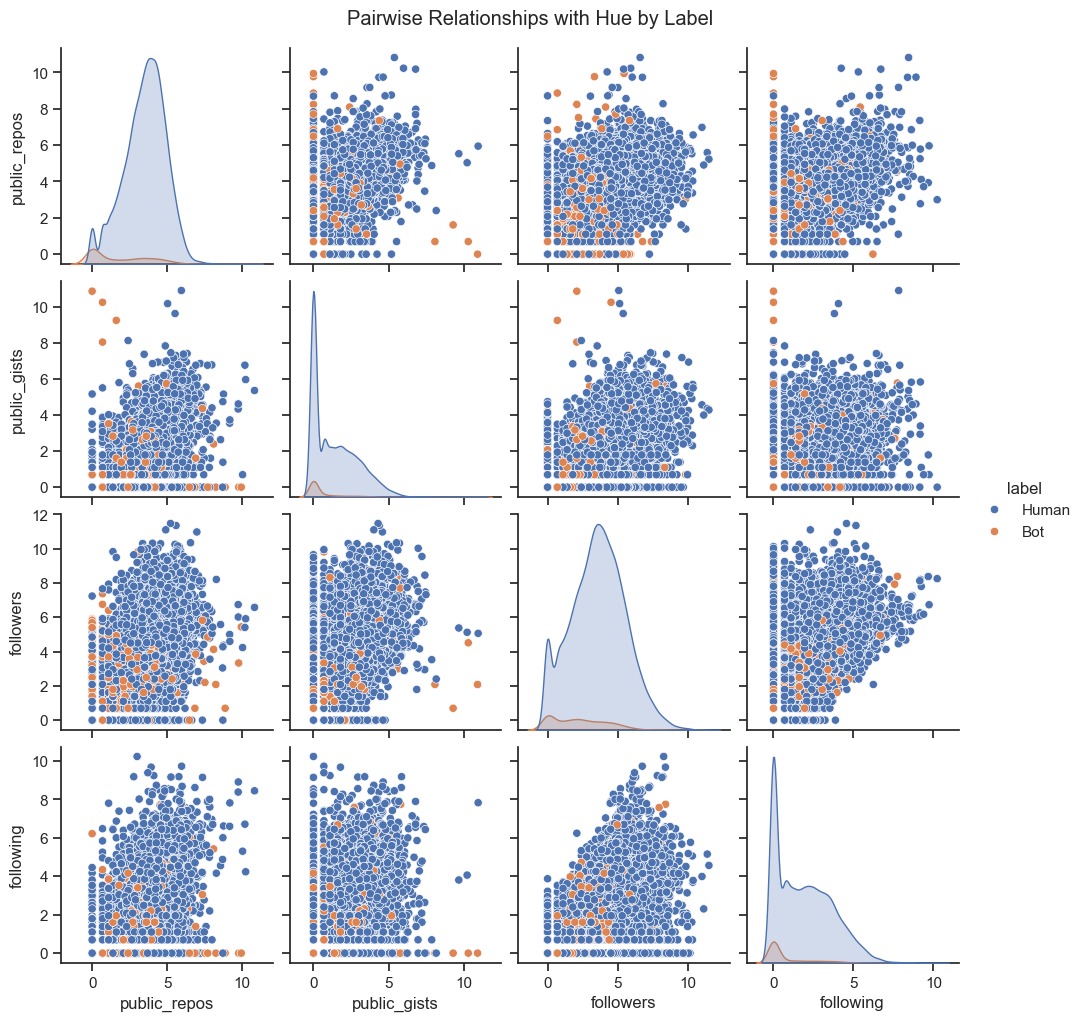

In [ ]:
features = ['public_repos', 'public_gists', 'followers', 'following']
sns.pairplot(df, vars=features, hue='label')
plt.suptitle('Pairwise Relationships with Hue by Label', y=1.02)
plt.show()

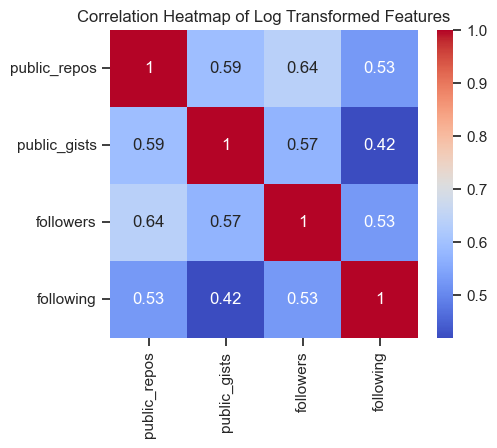

In [105]:
correlation_matrix = df[features].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Log Transformed Features')
plt.show()

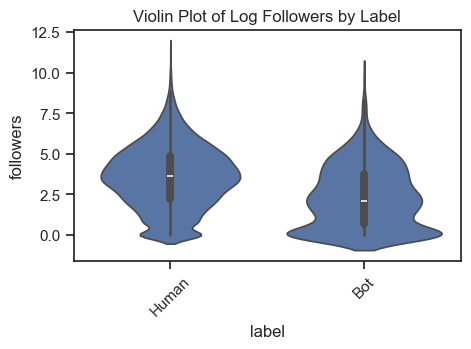

In [107]:
plt.figure(figsize=(5, 3))
sns.violinplot(x='label', y='followers', data=df)
plt.title('Violin Plot of Log Followers by Label')
plt.xticks(rotation=45)
plt.show()

In [116]:
import pandas_profiling as pp
report = pp.ProfileReport(df)
report

ImportError: cannot import name 'DataError' from 'pandas.core.base' (C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\base.py)